In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import exposure, color
from skimage.color import rgb2gray
import cv2
from skimage import exposure
from skimage import exposure, color


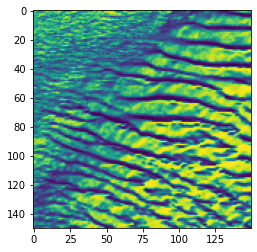

In [2]:
image1 = plt.imread('sand.jpg')
image1=cv2.pyrDown(image1)
image1=cv2.pyrDown(image1)
image1=exposure.equalize_hist(rgb2gray(image1))
plt.imshow(image1)

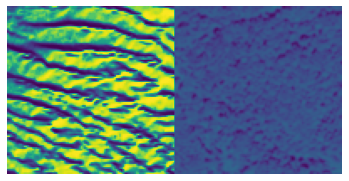

In [3]:

# Load two images
#image1 = plt.imread('residential_331.jpg')
#image1=exposure.equalize_hist(rgb2gray(image1))
#image1=exposure.equalize_hist(image1)
# image1=cv2.pyrDown(image1)
# image1=cv2.pyrDown(image1)
image2 = plt.imread('forest.jpg')
image2=cv2.pyrDown(image2)
image2=cv2.pyrDown(image2)
image2=rgb2gray(image2)
# Assuming the images have the same size for simplicity
# height, width = image1.shape
section_size = 100
stitched_image = np.zeros((section_size, section_size * 2))
stitched_image[0:100,0:100]=image1[50:150, 50:150]
stitched_image[0:100,100:200]=image2[0:100, 0:100]


# Convert the stitched image to grayscale
# stitched_gray = color.rgb2gray(stitched_image)

# Display the grayscale stitched image
plt.imshow(stitched_image)
plt.axis('off')
plt.show()


In [4]:
stitched_image.shape


(100, 200)

In [5]:
# image_uint = np.uint8(stitched_gray * 255)  # Scale the values to [0, 255] and convert to uint8
# print(image_uint)
image_uint=(stitched_image*4).astype(int)
print(image_uint)

[[0 0 0 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [6]:
image_uint.shape


(100, 200)

In [7]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Calculate GLCM for angles 0, 45, 90, and 135 degrees and a distance of 1
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
# num_levels = np.amax(image_uint) + 1  # Maximum grayscale value plus 1
glcm = greycomatrix(image_uint, distances=[1], angles=angles, levels=64, symmetric=False, normed=True)

# Pad the image with zeros
padded_image = np.pad(image_uint, 9, mode='symmetric')

# Initialize arrays to store textural features for each pixel
contrast_features = np.zeros_like(image_uint, dtype=np.float64)
dissimilarity_features = np.zeros_like(image_uint, dtype=np.float64)
ASM_features = np.zeros_like(image_uint, dtype=np.float64)
correlation_features = np.zeros_like(image_uint, dtype=np.float64)
std_dev_features = np.zeros_like(image_uint, dtype=np.float64)

# Compute textural features for each pixel
for i in range(image_uint.shape[0]):
    for j in range(image_uint.shape[1]):
        # Extract 3x3 window centered at the current pixel
        window = padded_image[i:i+19, j:j+19]

        # Calculate GLCM for the window
        glcm_window = greycomatrix(window, distances=[1], angles=angles, levels=64, symmetric=False, normed=True)
        
        # Calculate textural features for the GLCM
        contrast_features[i, j] = np.sum(greycoprops(glcm_window, 'contrast')) / 4
        dissimilarity_features[i, j] = np.sum(greycoprops(glcm_window, 'dissimilarity')) / 4
        ASM_features[i, j] = np.sum(greycoprops(glcm_window, 'ASM')) / 4
        correlation_features[i, j] = np.sum(greycoprops(glcm_window, 'correlation')) / 4
        std_dev_features[i, j] = np.std(window)

# Print or use the arrays as needed
print("Contrast Features:")
print(contrast_features)
print("\nDissimilarity Features:")
print(dissimilarity_features)
print("\nASM Features:")
print(ASM_features)
print("\nCorrelation Features:")
print(correlation_features)
print("\nStandard Deviation Features:")
print(std_dev_features)


Contrast Features:
[[0.57253086 0.55762671 0.5447937  ... 0.14944769 0.15383366 0.15838207]
 [0.5632716  0.54686485 0.53179825 ... 0.15090968 0.15529565 0.15984405]
 [0.55279402 0.53707765 0.52123944 ... 0.1539961  0.15838207 0.16293047]
 ...
 [0.81757635 0.79905783 0.78248863 ... 0.18839344 0.19744964 0.19586582]
 [0.84015595 0.81855101 0.78833658 ... 0.17852502 0.18831222 0.18823099]
 [0.82273392 0.80190058 0.77095517 ... 0.18157083 0.18985543 0.1882716 ]]

Dissimilarity Features:
[[0.51762508 0.51490416 0.50824399 ... 0.14944769 0.15383366 0.15838207]
 [0.51145224 0.50722872 0.49833496 ... 0.15090968 0.15529565 0.15984405]
 [0.50406108 0.50052794 0.49086257 ... 0.1539961  0.15838207 0.16293047]
 ...
 [0.45873944 0.45808967 0.45508447 ... 0.18839344 0.19744964 0.19586582]
 [0.46020143 0.45800845 0.44744964 ... 0.17852502 0.18831222 0.18823099]
 [0.45480019 0.45337882 0.44208902 ... 0.18157083 0.18985543 0.1882716 ]]

ASM Features:
[[0.15500285 0.15825698 0.16098567 ... 0.53024076 0.5

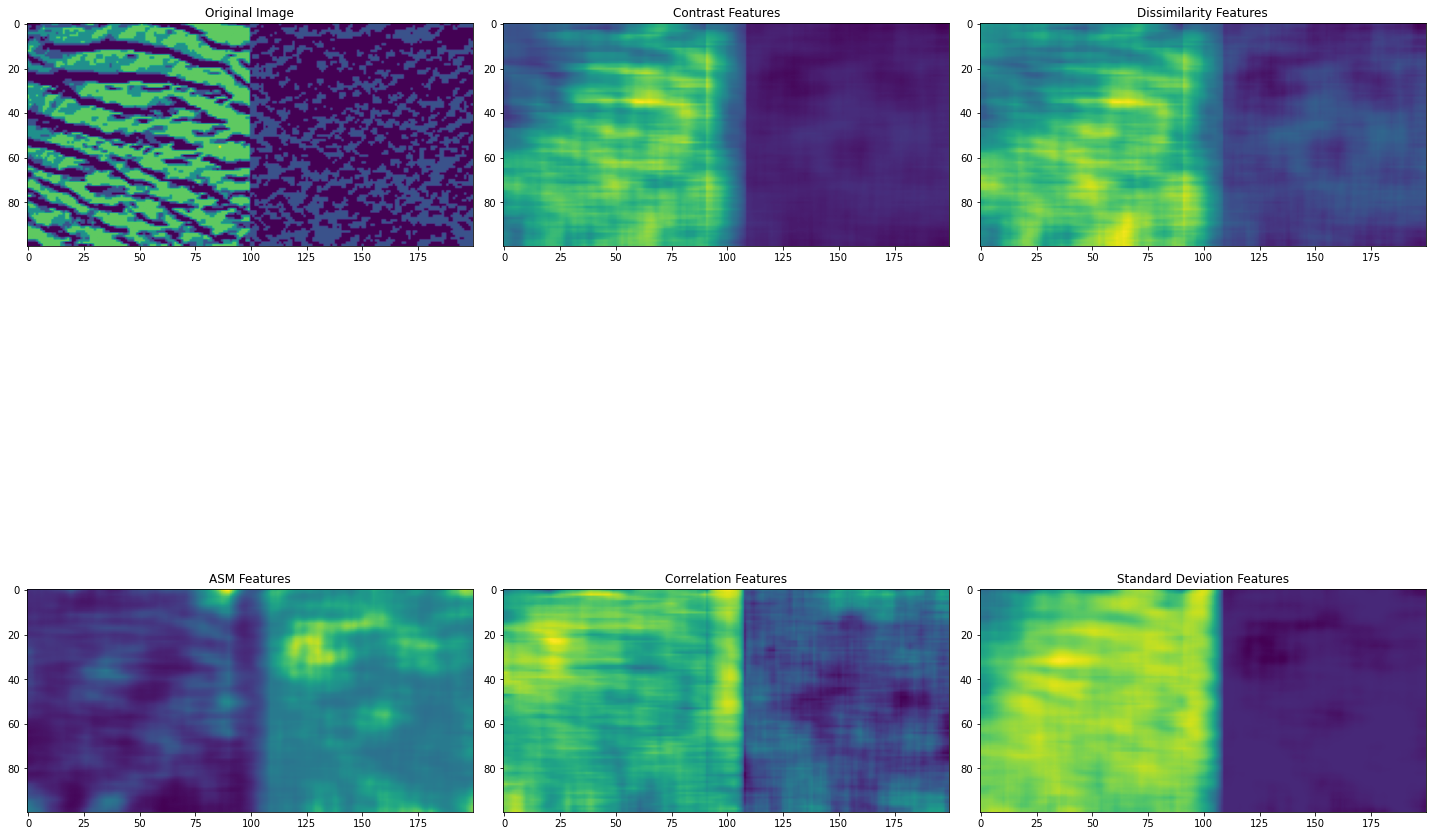

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(image_uint)
plt.title('Original Image')

# Display Contrast Features
plt.subplot(2, 3, 2)
plt.imshow(contrast_features)
# plt.colorbar(label='Contrast')
plt.title('Contrast Features')

# Display Dissimilarity Features
plt.subplot(2, 3, 3)
plt.imshow(dissimilarity_features)
#plt.colorbar(label='Dissimilarity')
plt.title('Dissimilarity Features')

# Display ASM Features
plt.subplot(2, 3, 4)
plt.imshow(ASM_features)
#plt.colorbar(label='ASM')
plt.title('ASM Features')

# Display Correlation Features
plt.subplot(2, 3, 5)
plt.imshow(correlation_features)
#plt.colorbar(label='Correlation')
plt.title('Correlation Features')

# Display Standard Deviation Features
plt.subplot(2, 3, 6)
plt.imshow(std_dev_features)
#plt.colorbar(label='Standard Deviation')
plt.title('Standard Deviation Features')

plt.tight_layout()
plt.show()


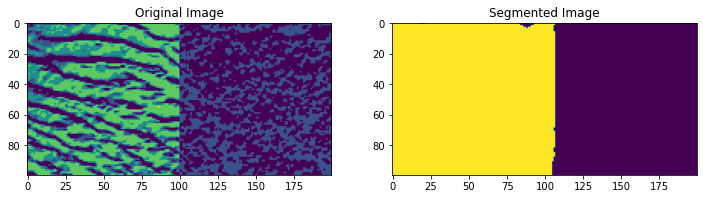

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Reshape the textural features into a 2D array for clustering
contrast_flat = contrast_features.flatten()
dissimilarity_flat = dissimilarity_features.flatten()
ASM_flat = ASM_features.flatten()
correlation_flat = correlation_features.flatten()
std_dev_flat = std_dev_features.flatten()

# Combine the flattened arrays into a single 2D array
X = np.column_stack((contrast_flat, dissimilarity_flat, ASM_flat, correlation_flat, std_dev_flat))

# Define the number of clusters
num_clusters = 2  # You can adjust this number as needed

# Perform K-means clustering
scaler=StandardScaler()
feat=scaler.fit_transform(X)
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(feat)

# Reshape the cluster labels back to the shape of the image
cluster_labels = cluster_labels.reshape(image_uint.shape)
fig = plt.figure(figsize=(12, 6))
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_uint)
plt.title('Original Image')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.imshow(cluster_labels) 
# plt.colorbar(label='Cluster')
plt.title('Segmented Image')

plt.show()


### Generate ground truth labels

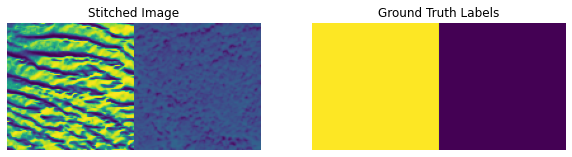

In [10]:

ground_truth_labels = np.zeros_like(stitched_image)  # Initialize with zeros
ground_truth_labels[:, :100] = 1  # 0's for image1 region
ground_truth_labels[:, 100:] = 0  # 1's labels for image2 region

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(stitched_image)
ax[0].set_title('Stitched Image')
ax[0].axis('off')

ax[1].imshow(ground_truth_labels)
ax[1].set_title('Ground Truth Labels')
ax[1].axis('off')

plt.show()

### Supervised Accuracy

In [11]:
from sklearn.metrics import accuracy_score

supervised_accuracy = accuracy_score(ground_truth_labels.flatten(), cluster_labels.flatten())

print("Supervised Accuracy:", supervised_accuracy)


Supervised Accuracy: 0.965


### unsupervised Accuracy

In [12]:
from sklearn.metrics import silhouette_score

unsupervised_accuracy = silhouette_score(feat, cluster_labels.flatten())

print("Unsupervised Accuracy (Silhouette Score):", unsupervised_accuracy)


Unsupervised Accuracy (Silhouette Score): 0.7080824578414485


### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ground_truth_labels.flatten(), cluster_labels.flatten())

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[9330  670]
 [  30 9970]]


In [14]:
from sklearn.metrics import classification_report

report = classification_report(ground_truth_labels.flatten(), cluster_labels.flatten())

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     10000
         1.0       0.94      1.00      0.97     10000

    accuracy                           0.96     20000
   macro avg       0.97      0.97      0.96     20000
weighted avg       0.97      0.96      0.96     20000



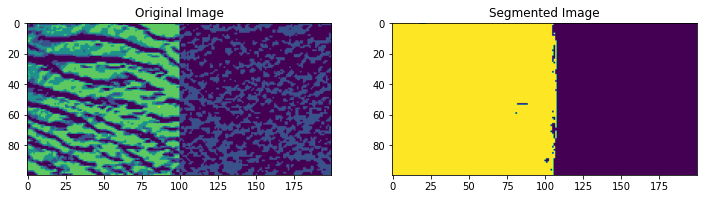

In [20]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Reshape the textural features into a 2D array for clustering
contrast_flat = contrast_features.flatten()
dissimilarity_flat = dissimilarity_features.flatten()
ASM_flat = ASM_features.flatten()
correlation_flat = correlation_features.flatten()
std_dev_flat = std_dev_features.flatten()

# Combine the flattened arrays into a single 2D array
X = np.column_stack((contrast_flat, dissimilarity_flat, ASM_flat, correlation_flat, std_dev_flat))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the SOM parameters
image_shape = image_uint.shape[:2]  # Image shape
grid_shape = (10,20)  # Adjust according to your image shape(10,20)
num_features = X_scaled.shape[1]  # Number of features
learning_rate = 0.5
sigma = 1.0
num_epochs = 1000

# Initialize the SOM
som = MiniSom(grid_shape[0], grid_shape[1], num_features, sigma=sigma, learning_rate=learning_rate)

# Train the SOM
som.train_random(X_scaled, num_epochs)

# Get the winner neuron for each feature vector
winners = np.array([som.winner(x) for x in X_scaled])

# Perform KMeans clustering on the winner neurons
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels1 = kmeans.fit_predict(winners)

# Reshape the cluster labels back to the shape of the original image
cluster_labels_resized1 = cluster_labels1.reshape(image_shape)

# Plotting
fig = plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_uint)
plt.title('Original Image')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.imshow(cluster_labels_resized1)
plt.title('Segmented Image')

plt.show()


In [21]:
# Compute the quantization error
quantization_error = som.quantization_error(X_scaled)
print("Quantization Error:", quantization_error)


Quantization Error: 0.5200589840059145


In [22]:
# Compute the topographic error
topographic_error = som.topographic_error(X_scaled)
print("Topographic Error:", topographic_error)


Topographic Error: 0.1401


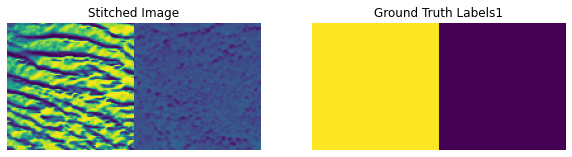

In [23]:

ground_truth_labels1 = np.zeros_like(stitched_image)  # Initialize with zeros
ground_truth_labels1[:, :100] = 1  # 0's for image1 region
ground_truth_labels1[:, 100:] = 0  # 1's labels for image2 region

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(stitched_image)
ax[0].set_title('Stitched Image')
ax[0].axis('off')

ax[1].imshow(ground_truth_labels1)
ax[1].set_title('Ground Truth Labels1')
ax[1].axis('off')

plt.show()

In [24]:
from sklearn.metrics import accuracy_score

# Assuming ground_truth_labels is the ground truth segmentation
# Flatten the ground truth labels
ground_truth_flat = ground_truth_labels1.flatten()

# Flatten the predicted labels
predicted_labels_flat = cluster_labels_resized1.flatten()

# Compute accuracy
accuracy = accuracy_score(ground_truth_flat, predicted_labels_flat)

print("Accuracy:", accuracy)

Accuracy: 0.9654


In [26]:
from sklearn.metrics import classification_report

report = classification_report(ground_truth_flat, predicted_labels_flat)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     10000
         1.0       0.94      1.00      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [27]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the clustered data
silhouette_avg = silhouette_score(X_scaled, cluster_labels1)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.702800730213723
